In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("Tweets.csv")
df = data.copy()
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [3]:
def missing_values_table(df):    
        mis_val = df.isnull().sum()        
        mis_val_percent = 100 * df.isnull().sum() / len(df)        
        type_column = df.dtypes        
        mis_val_table = pd.concat([mis_val, mis_val_percent, type_column], axis=1)        
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2:'type_column'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
def barplot(x_data, y_data, error_data = "", x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    # ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

In [4]:
missing_values_table(data)

Your selected dataframe has 15 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values,type_column
negativereason_gold,14608,99.8,object
airline_sentiment_gold,14600,99.7,object
tweet_coord,13621,93.0,object
negativereason,5462,37.3,object
user_timezone,4820,32.9,object
tweet_location,4733,32.3,object
negativereason_confidence,4118,28.1,float64


In [5]:
df = df.drop(["negativereason_gold","airline_sentiment_gold","tweet_coord"], axis=1)
'''
for i, row in info_about_data.iterrows():
    
    column = data[row.name].value_counts() 
    info_column = {'key':  column.index,'value': column.values}
    df_info_column = pd.DataFrame(info_column, columns = ['key','value'])

    total_value = data[i].count()
    nb_missing = data.shape[0] - total_value 
    
    percentage = []
    value_to_replace = []
    
    for key, row in df_info_column.iterrows():
        per = round((row['value'] * 100 ) / total_value)
        percentage.append(per)

        to_replace =  round((per * nb_missing) / 100 ) 
        value_to_replace.append(to_replace)

    df_info_column['percentage'] = percentage
    df_info_column['to_replace'] = value_to_replace
    # prizm_social_one,  prizm_social_one, area, marital
'''

"\nfor i, row in info_about_data.iterrows():\n    \n    column = data[row.name].value_counts() \n    info_column = {'key':  column.index,'value': column.values}\n    df_info_column = pd.DataFrame(info_column, columns = ['key','value'])\n\n    total_value = data[i].count()\n    nb_missing = data.shape[0] - total_value \n    \n    percentage = []\n    value_to_replace = []\n    \n    for key, row in df_info_column.iterrows():\n        per = round((row['value'] * 100 ) / total_value)\n        percentage.append(per)\n\n        to_replace =  round((per * nb_missing) / 100 ) \n        value_to_replace.append(to_replace)\n\n    df_info_column['percentage'] = percentage\n    df_info_column['to_replace'] = value_to_replace\n    # prizm_social_one,  prizm_social_one, area, marital\n"

In [6]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')

[9178 3099 2363]


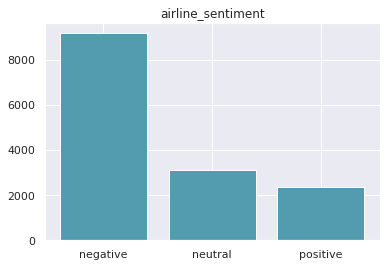

In [7]:

# print(i)
feature = df['airline_sentiment'].value_counts()
print(feature.values)
barplot(feature.index, feature.values, x_label="", y_label="", title='airline_sentiment') 
df = df.drop(["tweet_id", "name"], axis=1)

In [8]:
columns = df.columns

In [9]:
data_info = missing_values_table(df)
data_info

Your selected dataframe has 10 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values,type_column
negativereason,5462,37.3,object
user_timezone,4820,32.9,object
tweet_location,4733,32.3,object
negativereason_confidence,4118,28.1,float64


Float64Index([   1.0,    0.0, 0.6667, 0.6632, 0.6596, 0.6733, 0.6809, 0.3441,
              0.6559, 0.6701,
              ...
              0.6312,  0.393, 0.3379, 0.6346, 0.3349, 0.3386, 0.3577, 0.3249,
               0.329, 0.3255],
             dtype='float64', length=1410)


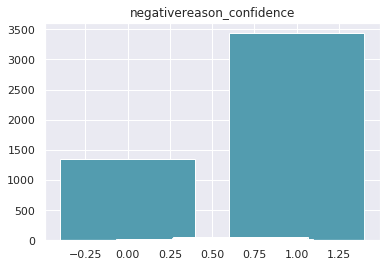

In [10]:
for index, row in data_info.iterrows() :
    if index == "negativereason_confidence":
        
        feature = data[index].value_counts()
        print(feature.index)
        barplot(feature.index, feature.values, x_label="", y_label="", title = index) 


Index(['Customer Service Issue', 'Late Flight', 'Can't Tell',
       'Cancelled Flight', 'Lost Luggage', 'Bad Flight',
       'Flight Booking Problems', 'Flight Attendant Complaints', 'longlines',
       'Damaged Luggage'],
      dtype='object')


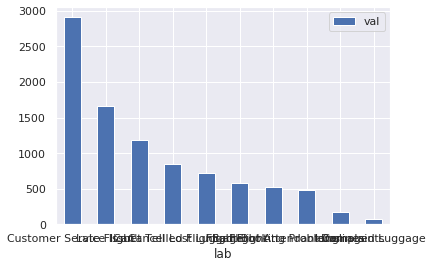

In [11]:

df_ = pd.DataFrame({'lab':data['negativereason'].value_counts().index , 'val':data['negativereason'].value_counts().values })
ax = df_.plot.bar(x='lab', y='val', rot=0)
print(data['negativereason'].value_counts().index)

In [12]:
feature = df['negativereason'].value_counts()

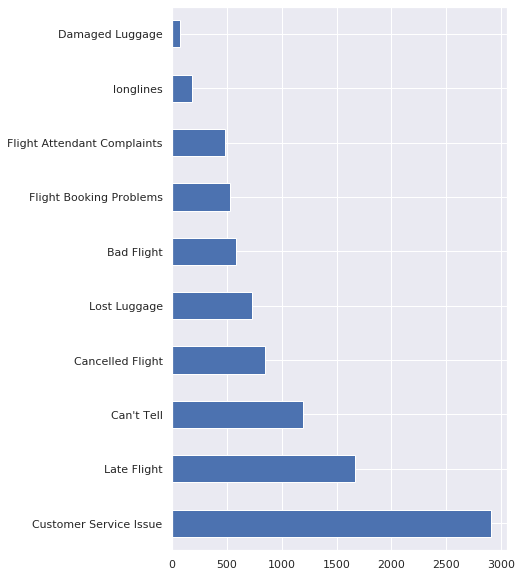

In [14]:
# lineplot(feature.index, feature.values,x_label="", y_label="", title="cc")
data['negativereason'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

In [16]:
df.columns
df.dtypes

airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
retweet_count                     int64
text                             object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [23]:
for i in range(10):
    print(df['text'][i])

@VirginAmerica What @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it
@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA
@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)
@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP
@virginamerica Well, I didn't…but NOW I DO! :-D
@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.


In [ ]:
#